## Lab 4: Probability Density Estimation

The data for this lab is some test measurements on production lines of Bosh company (see. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» on Kaggle). The measurements Bosh uses to determine defects in assembled equipment. 

All the original Bosh data does not fit into the computer's RAM, so the `data.csv` file contains only a few features. Read the data from the `data.csv` file. The target attribute here is `Response` — the presence of  defects in equipment.

In [1]:
import pandas as pd

In [2]:
# place for code
data = pd.read_csv('data.csv')
data.head(5)

,L1_S24_F1844,L1_S24_F1846,Response
0,-0.123,0.111,0
1,-0.269,0.175,0
2,-0.058,0.141,0
3,0.136,-0.145,0
4,0.045,-0.094,0


## 1 
Plot two approximations to the probability density of the attribute `L1_S24_F1846` for `Response = 0` and for `Response = 1` using one of the following kernels (select the kernel number using the formula: `(n mod 6) + 1`, where `n` is your number in the group list):

    1.	tophat
    2.	gaussian
    3.	linear  
    4.	cosine
    5.	epanechnikov
    6.	exponential


In [3]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples returns logarithm of density

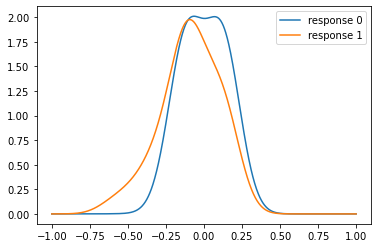

In [4]:
# place for code
fig, ax = plt.subplots()
i0 = data['Response'] == 0
i1 = data['Response'] == 1
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i1, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))
Dens1 = np.exp(kde1.score_samples(X_plot))
ax.plot( X_plot , Dens0, label='response 0')
ax.plot( X_plot , Dens1, label='response 1')
ax.legend()

Answer in the comments to the question: is the sample well separable on the basis of `L1_S24_F1846`?

In [5]:
# place for comments
# yes

## 2

Split the `data` sample into two equal parts: the training `dataTrain` and the test `dataTest'.

In [6]:
dataTrain = data.loc[0:data.shape[0] / 2, ].reset_index(drop=True)
dataTest = data.loc[data.shape[0] / 2:data.shape[0], ].reset_index(drop=True)

Using cross-validation, select **for each `Response` class (`r=0` and `r=1`)** the value of the `bandwidth` kernel width, at which the logarithm of likelihood is maximal on the test sample.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # replace -infinity
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [7]:
# place for code
r = 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.02)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # replace -infinity
logLikehood0 = logProbability0.sum()
print(logLikehood0)
r = 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.02)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # replace -infinity
logLikehood1 = logProbability1.sum()
print(logLikehood1)

22187.91483926837
114.41072956036932


### 3

For the best `bandwidth` found, calculate `p(x|0)` and `p(x|1)` for the test sample.

In [8]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
print(predictionProbXafter0, predictionProbXafter1)

[1.63558877 2.87525343 3.26947459 ... 3.33437822 2.73013445 3.51698938] [1.03539715 1.74828163 1.92741615 ... 1.8533069  2.13669537 3.58809299]


Using the Bayes formula, then find `p(0|x)` and `p(1|x)`. Sort all objects in the test sample in ascending order of the predicted probability `p(1|x)`, display the probabilities for the last 10 objects and calculate the number of defective equipment among the last 100 objects in the sorted list.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - sorting, which returns indexes
    print(predictionProb1afterX[ind[-10:]]) - print last 10 elements
    print(sum(dataTest.loc[ind[-100:],'Response'])) - number of defective equipment among the last 100 with the highest probability of defect

In [9]:
# place for code
j0 = dataTest['Response'] == 0
j1 = dataTest['Response'] == 1
predictionProb0afterX =  predictionProbXafter0 * (sum([1 for i in dataTest.loc[j0, 'Response'].values.tolist()])/len(dataTest))
predictionProb1afterX = predictionProbXafter1 * (sum([1 for i in dataTest.loc[j1, 'Response'].values.tolist()])/len(dataTest))
ind = np.argsort(predictionProb1afterX)
print(predictionProb1afterX[ind[-10:]])
print(sum(dataTest.loc[ind[-100:],'Response']))

[0.0344864 0.0344864 0.0344864 0.0344864 0.0344864 0.0344864 0.0344864
 0.0344864 0.0344864 0.0344864]
2
